In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', 20)
pd.set_option('display.max_rows', 25)

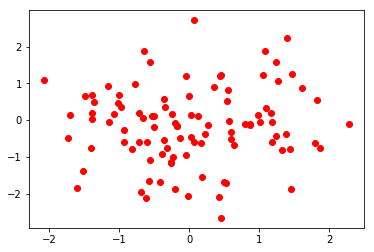

In [2]:
plt.plot(np.random.normal(size = 100), np.random.normal(size = 100), 'ro')

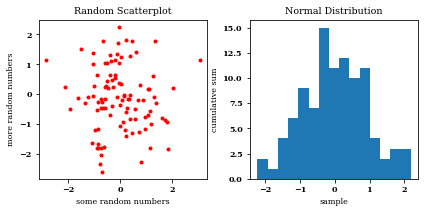

In [4]:
with mpl.rc_context(rc = {'font.family' : 'serif', 'font.weight':'bold','font.size':8}):
    fig = plt.figure(figsize = (6,3))
    ax1 = fig.add_subplot(121)
    ax1.set_ylabel('more random numbers')
    ax1.set_xlabel('some random numbers')
    ax1.set_title('Random Scatterplot')
    plt.plot(np.random.normal(size = 100),np.random.normal(size = 100), 'r.')
    ax2 = fig.add_subplot(122)
    plt.hist(np.random.normal(size = 100), bins = 15)
    ax2.set_xlabel('sample')
    ax2.set_ylabel('cumulative sum')
    ax2.set_title('Normal Distribution')
    plt.tight_layout()
    plt.savefig('normalvars.png', dpi = 150)


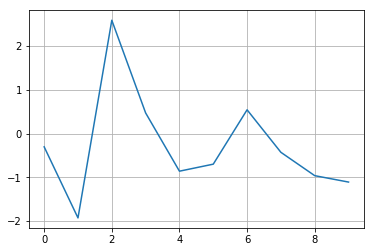

In [6]:
normals = pd.Series(np.random.normal(size = 10))
normals.plot(grid = True)

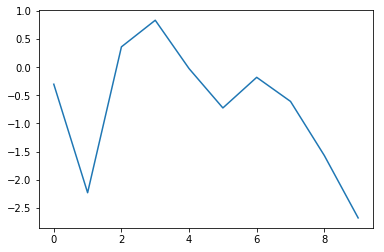

In [7]:
normals.cumsum().plot(grid = False)

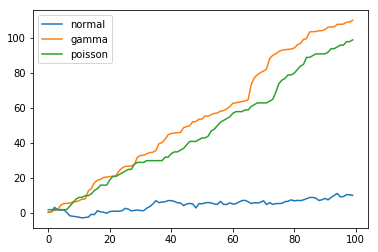

In [8]:
variables = pd.DataFrame({'normal' : np.random.normal(size = 100),
                         'gamma' : np.random.gamma(1, size = 100),
                         'poisson' : np.random.poisson(size = 100)})
variables.cumsum(0).plot()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000020A27A13CC0>,
      dtype=object)

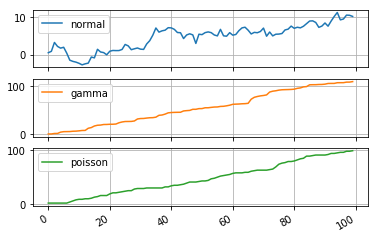

In [10]:
variables.cumsum(0).plot(subplots = True, grid = True)

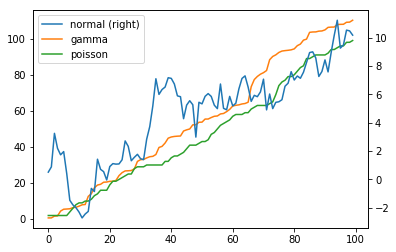

In [11]:
variables.cumsum(0).plot(secondary_y = 'normal')

Text(0, 0.5, 'cumulative sum')

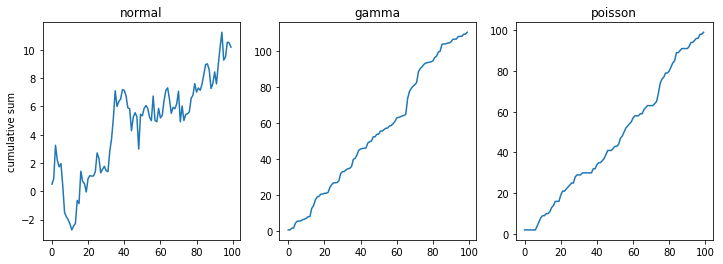

In [22]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))
for i, var in enumerate(['normal','gamma','poisson']):
    axes[i].plot(variables[var].cumsum(0))
    axes[i].set_title(var)
axes[0].set_ylabel('cumulative sum')

In [23]:
titanic = pd.read_excel('https://github.com/fonnesbeck/statistical-analysis-python-tutorial/blob/master/data/titanic.xls?raw=true', "titanic")

In [24]:
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


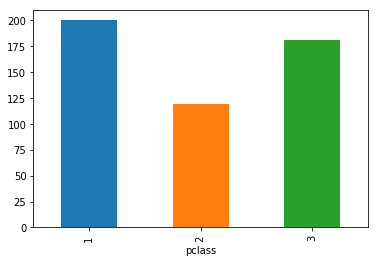

In [28]:
titanic.groupby('pclass').survived.sum().plot(kind = 'bar')

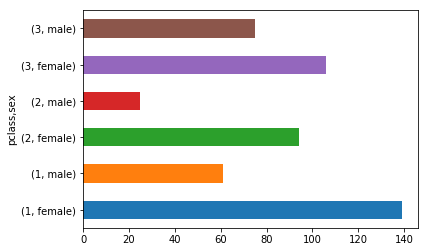

In [29]:
titanic.groupby(['pclass','sex']).survived.sum().plot(kind='barh')

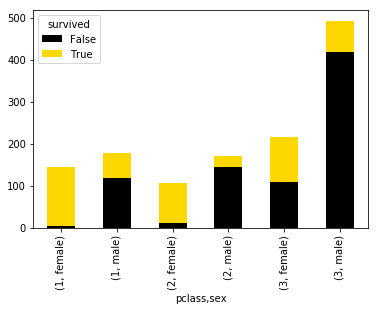

In [30]:
death_counts = pd.crosstab([titanic.pclass, titanic.sex], titanic.survived.astype(bool))
death_counts.plot(kind = 'bar', stacked = True, color = ['black', 'gold'])

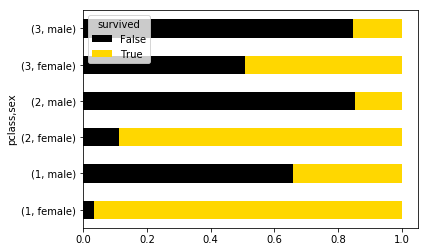

In [31]:
death_counts.div(death_counts.sum(1).astype(float), axis = 0).plot(kind = 'barh', stacked = True, color = ['black','gold'])

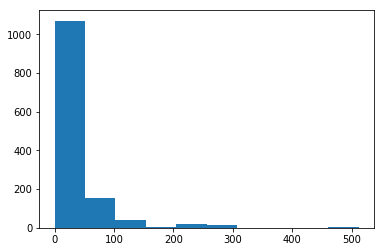

In [32]:
titanic.fare.hist(grid = False)

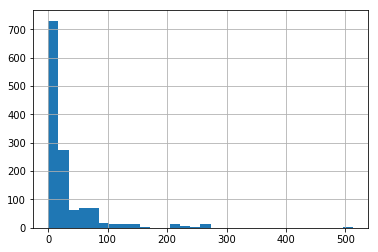

In [33]:
titanic.fare.hist(bins = 30)

In [34]:
sturges = lambda n : int(np.log2(n) + 1)
square_root = lambda n : int(np.sqrt(n))
from scipy.stats import kurtosis
doanes = lambda data : int(1 + np.log(len(data)) + np.log(1 + kurtosis(data)*(len(data)/6.)**0.5))

n = len(titanic)
sturges(n), square_root(n), doanes(titanic.fare.dropna())

(11, 36, 14)

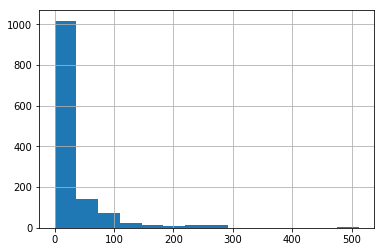

In [35]:
titanic.fare.hist(bins = doanes(titanic.fare.dropna()))

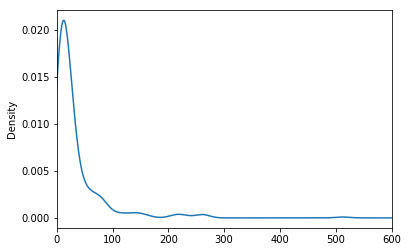

In [36]:
titanic.fare.dropna().plot(kind = 'kde', xlim = (0, 600))

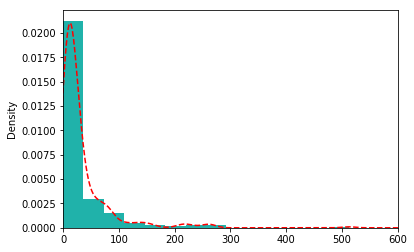

In [38]:
titanic.fare.hist(bins = doanes(titanic.fare.dropna()), density = True, color = 'lightseagreen')
titanic.fare.dropna().plot(kind = 'kde', xlim = (0, 600), style = 'r--')

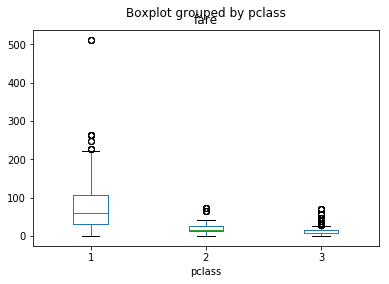

In [39]:
titanic.boxplot(column = 'fare', by = 'pclass', grid = False)

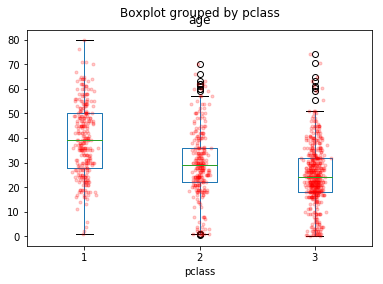

In [41]:
bp = titanic.boxplot(column = 'age', by = 'pclass', grid = False)
for i in [1,2,3]:
    y = titanic.age[titanic.pclass == i].dropna()
    x = np.random.normal(i, 0.04, size = len(y))
    plt.plot(x, y, 'r.', alpha  = 0.2)

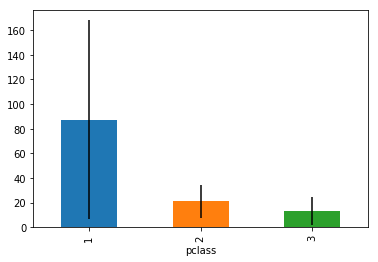

In [42]:
titanic.groupby('pclass')['fare'].mean().plot(kind = 'bar', yerr = titanic.groupby('pclass')['fare'].std())

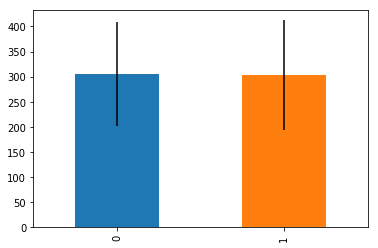

In [43]:
data1 = [150, 155, 175, 200, 245, 255, 395, 300, 305, 320, 375, 400, 420, 430, 440]
data2 = [225, 380]

fake_data = pd.DataFrame([data1,data2]).transpose()
p = fake_data.mean().plot(kind = 'bar', yerr = fake_data.std(), grid = False)

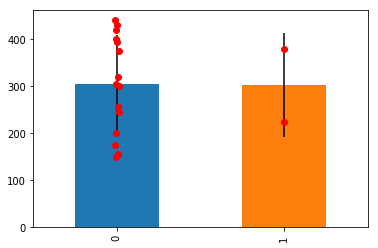

In [45]:
fake_data = pd.DataFrame([data1, data2]).transpose()
p = fake_data.mean().plot(kind = 'bar', yerr = fake_data.std(), grid = False)
x1, x2 = p.xaxis.get_majorticklocs()
plt.plot(np.random.normal(x1, 0.01, size = len(data1)), data1, 'ro')
plt.plot([x2]*len(data2), data2, 'ro')

In [46]:
baseball = pd.read_csv('https://github.com/fonnesbeck/statistical-analysis-python-tutorial/raw/master/data/baseball.csv')
baseball.head()

,id,player,year,stint,team,lg,g,ab,r,h,...,rbi,sb,cs,bb,so,ibb,hbp,sh,sf,gidp
0,88641,womacto01,2006,2,CHN,NL,19,50,6,14,...,2.0,1.0,1.0,4,4.0,0.0,0.0,3.0,0.0,0.0
1,88643,schilcu01,2006,1,BOS,AL,31,2,0,1,...,0.0,0.0,0.0,0,1.0,0.0,0.0,0.0,0.0,0.0
2,88645,myersmi01,2006,1,NYA,AL,62,0,0,0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,88649,helliri01,2006,1,MIL,NL,20,3,0,0,...,0.0,0.0,0.0,0,2.0,0.0,0.0,0.0,0.0,0.0
4,88650,johnsra05,2006,1,NYA,AL,33,6,0,1,...,0.0,0.0,0.0,0,4.0,0.0,0.0,0.0,0.0,0.0


(0, 200)

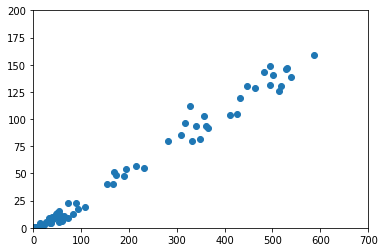

In [47]:
plt.scatter(baseball.ab, baseball.h)
plt.xlim(0,700); plt.ylim(0,200)

(0, 200)

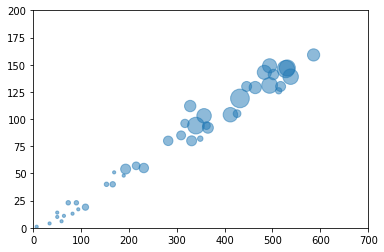

In [48]:
plt.scatter(baseball.ab, baseball.h, s = baseball.hr*10, alpha = 0.5)
plt.xlim(0, 700); plt.ylim(0,200)

(0, 200)

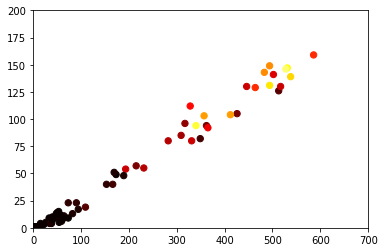

In [49]:
plt.scatter(baseball.ab, baseball.h, c = baseball.hr, s = 40, cmap = 'hot')
plt.xlim(0, 700); plt.ylim(0, 200)

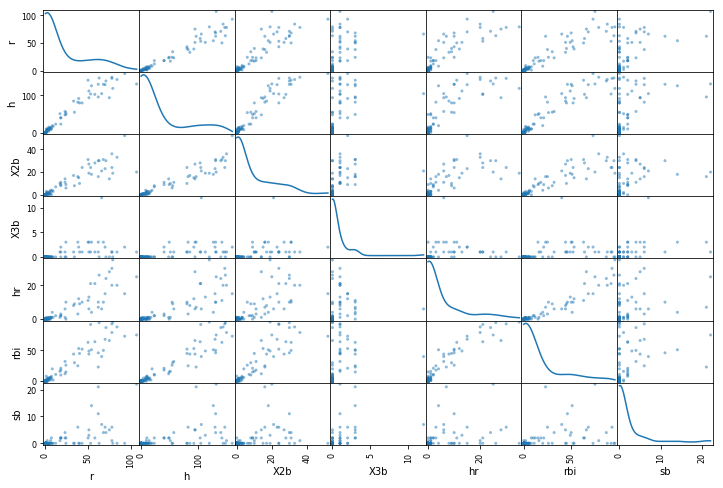

In [51]:
_ = pd.plotting.scatter_matrix(baseball.loc[:, 'r':'sb'], figsize = (12, 8), diagonal = 'kde')

In [53]:
from pandas.tools.rplot import *
titanic = titanic[titanic.age.notnull() & titanic.fare.notnull()]

tp = RPlot(titanic, x = 'age')
tp.add(TrellisGrid['pclass','sex'])
tp.add(GeomDensity())
_ = tp.render(plt.gcf())

ModuleNotFoundError: No module named 'pandas.tools.rplot'